<a href="https://colab.research.google.com/github/deiivid10/METODOS-NUMERICOS/blob/main/POLINOMIO%20DE%20LAGRANGE%20CON%20SYMPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CALCULAR EL POLINOMIO DE LAGRANGE CON SYMPY Y GRAFICARLO (Con el ejemplo que utilizamos en clase para resolverlo)



Polinomio grado: 0.00182510288066062*x**4 + 0.0552927983539035*x**3 - 0.343046604938309*x**2 + 0.073391347736532*x + 0.977735055967088
Evaluación de polinomios parciales en x = 1.5:

P_01(x) = 1.24890336666667 - 0.483705666666666*x
P_01(1.5) = 0.523344866666671
Error absoluto: 0.01151716666667102

P_04(x) = 1.31089386666667 - 0.545696166666667*x
P_04(1.5) = 0.49234961666666965
Error absoluto: 0.019478083333330343

P_12(x) = 1.3337158 - 0.548946*x
P_12(1.5) = 0.5102967999999999
Error absoluto: 0.0015309000000001127

P_123(x) = -0.0494433333333335*x**2 - 0.405560333333334*x + 1.23087366666666
P_123(1.5) = 0.5112856666666585
Error absoluto: 0.0005420333333414629

P_012(x) = -0.10873388888889*x**2 - 0.23361772222222*x + 1.10754931111111
P_012(1.5) = 0.5124714777777776
Error absoluto: 0.0006437777777775766

P_01234(x) = 0.00182510288066062*x**4 + 0.0552927983539035*x**3 - 0.343046604938309*x**2 + 0.073391347736532*x + 0.977735055967088
P_01234(1.5) = 0.5118199942384595
Error absoluto: 7.705

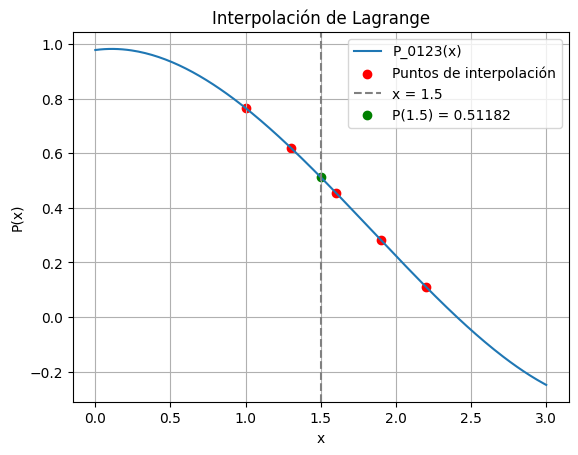

In [28]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import itertools

puntos = [(1.0, 0.7651977), (1.3, 0.6200860), (1.6, 0.4554022), (1.9, 0.2818186), (2.2, 0.1103623)]
x_eval = 1.5
f_real = 0.5118277
x = sp.Symbol('x')

def polinomio_lagrange(puntos_sub):
    n = len(puntos_sub)
    pol = 0
    for i in range(n):
        xi, yi = puntos_sub[i]
        termino = yi
        for j in range(n):
            if i != j:
                xj, _ = puntos_sub[j]
                termino *= (x - xj) / (xi - xj)
        pol += termino
    return sp.simplify(pol)

polinomio = polinomio_lagrange(puntos)
print("Polinomio grado:",polinomio)

# Mostrar resultados para P_01, P_04, P_12, P_123, P_012, P_01234
subconjuntos = {
    'P_01': [puntos[0], puntos[1]],
    'P_04': [puntos[0], puntos[4]],
    'P_12': [puntos[1], puntos[2]],
    'P_123': [puntos[1], puntos[2], puntos[3]],
    'P_012': [puntos[0], puntos[1], puntos[2]],
    'P_01234': [puntos[0], puntos[1], puntos[2], puntos[3], puntos[4]],
}

print("Evaluación de polinomios parciales en x = 1.5:\n")
for nombre, subconjunto in subconjuntos.items():
    pol = polinomio_lagrange(subconjunto)
    pol_func = sp.lambdify(x, pol, 'numpy')
    valor = pol_func(x_eval)
    error = abs(f_real - valor)
    print(f"{nombre}(x) = {pol}")
    print(f"{nombre}({x_eval}) = {valor}")
    print(f"Error absoluto: {error}\n")


pol_total = polinomio_lagrange(subconjuntos['P_01234'])
pol_total_func = sp.lambdify(x, pol_total, 'numpy')
x_vals = np.linspace(0.0, 3.0, 200)
y_vals = pol_total_func(x_vals)
resultado = pol_total_func(x_eval)

plt.plot(x_vals, y_vals, label='P_0123(x)')
plt.scatter(*zip(*puntos), color='red', label='Puntos de interpolación')
plt.axvline(x_eval, color='gray', linestyle='--', label=f'x = {x_eval}')
plt.scatter([x_eval], [resultado], color='green', label=f'P({x_eval}) = {resultado:.5f}')
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("Interpolación de Lagrange")
plt.legend()
plt.grid()
plt.show()



**Importamos las libreriaras** ↑

    import sympy as sp
    import numpy as np
    import matplotlib.pyplot as plt

**Aqui colocamos los puntos de interpolacion.** ↑

    puntos = [(1.0, 0.7651977), (1.3, 0.6200860), (1.6, 0.4554022), (1.9, 0.2818186), (2.2, 0.1103623)]

**Valor en el que queremos evaluar el polinomio** ↑

    x_eval = 1.5

**Valor real conocido de la funcion para x** ↑

    f_real = 0.5118277

**Creamos x como una variable simbolica con sp.Symbol.** ↑

    x = sp.Symbol('x')

#Función que genera el polinomio de Lagrange para cualquier subconjunto de puntos:
   
**def polinomio_lagrange(puntos_sub):**

**n = len(puntos_sub)**  # NUMERO DE PUNTOS

**pol = 0**    # INICIALIZAMOS EL POLINOMIO EN 0

**for i in range(n):**  # Recorremos cada punto para construir su término de Lagrange

**xi, yi = puntos_sub[i]**  # OBTENEMOS XI Y F(XI)

**termino = yi**    # COMENZAMOS CON F(XI)
  
**for j in range(n):**  # Construimos el producto del término de Lagrange

**if i != j:**

**xj, _ = puntos_sub[j]:**

**termino *= (x - xj) / (xi - xj)**

**pol += termino**    # Sumamos cada término al polinomio total

**return sp.simplify(pol)** # Simplificamos el polinomio para que se vea bonito



# CREAR Y EVALUAR POLINOMIO COMPLETO
**Creamos el polinomio de grado 3 con todos los puntos: P_01234**

    pol_total = polinomio_lagrange(puntos)

**Convertimos el polinomio simbólico en una función de numpy para evaluarlo fácilmente**

    pol_total_func = sp.lambdify(x, pol_total, 'numpy')

**Creamos un rango de valores de x para graficar el polinomio**

    x_vals = np.linspace(0.0, 3.0, 200)     # Rango de x desde 0.0 a 3.0
    y_vals = pol_total_func(x_vals)        # Evaluamos el polinomio en ese rango

**Evaluamos el polinomio en x = 1.5**

    resultado = pol_total_func(x_eval)

**GRAFICAR RESULTADOS**

    plt.figure(figsize=(8, 5))  # Tamaño de la figura

**Graficamos el polinomio**

    plt.plot(x_vals, y_vals, label='P_0123(x)', color='blue')

**Dibujamos los puntos originales (interpolación)**

    plt.scatter(*zip(*puntos), color='red', label='Puntos de interpolación')

**Línea vertical donde se evalúa el polinomio (x = 1.5)**

    plt.axvline(x_eval, color='gray', linestyle='--', label=f'x = {x_eval}')

**Punto verde: resultado de P(x_eval)**

    plt.scatter([x_eval], [resultado], color='green', label=f'P({x_eval}) = {resultado:.5f}')

# Etiquetas y leyenda
    plt.xlabel("x")

    plt.ylabel("P(x)")

    plt.title("Interpolación de Lagrange - Polinomio P_0123")

    plt.legend()

    plt.grid(True)

    plt.tight_layout()

# Mostramos la gráfica
    plt.show()
